# Pré Requis

In [ ]:
#Connect to google drive
from google.colab import drive
drive.mount('/content/gdrive')
import os
os.chdir("/content/gdrive/My Drive")

Mounted at /content/gdrive


In [ ]:
!pip install finta
!pip install pycoingecko
!pip install mplfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 70 kB 3.2 MB/s 


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
import json
import time
from datetime import date, timedelta, datetime
from finta import TA
import mplfinance as mpf

# Fonction

## Get Data

In [ ]:
def daily_price_historical(symbol, comparison_symbol, limit=1, aggregate=1, exchange='', allData='true'):
    url = 'https://min-api.cryptocompare.com/data/histoday?fsym={}&tsym={}&limit={}&aggregate={}&allData={}'\
            .format(symbol.upper(), comparison_symbol.upper(), limit, aggregate, allData)
    if exchange:
        url += '&e={}'.format(exchange)
    page = requests.get(url)
    data = page.json()['Data']
    df = pd.DataFrame(data)
    if not df.empty:
      df['timestamp'] = [datetime.fromtimestamp(d) for d in df.time]
    return df

## Strategie

In [ ]:
def StrategyTRIMA(df):
  l=["NEUTRAL"]
  c=0
  for i in range(1,len(df)):
    if df["TRIMA30"][i]>df["TRIMA90"][i] and df["TRIMA30"][i-1]<=df["TRIMA90"][i-1]:
      l.append("BUY")
      c=1
    elif df["TRIMA30"][i]<df["TRIMA90"][i] and df["TRIMA30"][i-1]>=df["TRIMA90"][i-1]:
      l.append("SELL")
      c=2
    else:
      if c==1:
        l.append("NEUTRAL +")
      elif c==2 :
        l.append("NEUTRAL -")
      else:
        l.append("NEUTRAL")
  df["Strat_TRIMA"]=l
  return df

In [ ]:
def StrategyRSI(df):
  l=["NEUTRAL"]
  c=0
  for i in range(1,len(df)):
    if df["RSI"][i]<20:
      c=1
      l.append("BUY")
    elif df["RSI"][i]>80:
      c=2
      l.append("SELL")
    else:
      if c==1:
        l.append("NEUTRAL +")
      elif c==2 :
        l.append("NEUTRAL -")
      else:
        l.append("NEUTRAL")
  df["Strat_RSI"]=l
  return df

In [ ]:
def StrategyEMA(df):
  l=["NEUTRAL"]
  c=0
  for i in range(1,len(df)):
    if df["EMA7"][i]>df["EMA20"][i] and df["EMA7"][i-1]<=df["EMA20"][i-1] and df["EMA7"][i]>df["EMA50"][i] and df["EMA20"][i]>df["EMA50"][i]:
      l.append("BUY")
      c=1
    elif df["EMA7"][i]<df["EMA20"][i] and df["EMA7"][i-1]>=df["EMA20"][i-1] and df["EMA7"][i]<df["EMA50"][i] and df["EMA20"][i]<df["EMA50"][i]:
      l.append("SELL")
      c=2
    else:
      if c==1:
        l.append("NEUTRAL +")
      elif c==2 :
        l.append("NEUTRAL -")
      else:
        l.append("NEUTRAL")
  df["Strat_EMA"]=l
  return df

In [ ]:
def StrategyMACD(df):
  l=["NEUTRAL"]
  c=0
  for i in range(1,len(df)):
    if df["MACD"][i]>df["SIGNAL"][i] and df["MACD"][i-1]<=df["SIGNAL"][i-1] and df["MACD"][i]>0:
      l.append("BUY")
      c=1
    elif df["MACD"][i]<df["SIGNAL"][i] and df["MACD"][i-1]>=df["SIGNAL"][i-1] and df["MACD"][i]<0:
      l.append("SELL")
      c=2
    else:
      if c==1 :
        l.append("NEUTRAL +")
      elif c==2 :
        l.append("NEUTRAL -")
      else:
        l.append("NEUTRAL")
  df["Strat_MACD"]=l
  return df

In [ ]:
def StrategyDMI(df):
  l=["NEUTRAL"]
  c=0
  for i in range(1,len(df)):
    if df["DI+"][i]>df["DI-"][i] and df["DI+"][i-1]<=df["DI-"][i-1] and df["ADX"][i]>=30 :
      l.append("BUY")
      c=1
    elif df["DI+"][i]<df["DI-"][i] and df["DI+"][i-1]>=df["DI-"][i-1] and df["ADX"][i]>=30:
      l.append("SELL")
      c=2
    else:
      if c==1 :
        l.append("NEUTRAL +")
      elif c==2 :
        l.append("NEUTRAL -")
      else:
        l.append("NEUTRAL")
  df["Strat_DMI"]=l
  return df

In [ ]:
def StrategySAR(df):
  l=["NEUTRAL"]
  c=0
  for i in range(1,len(df)):
    if df["SAR"][i]>df["close"][i] and df["SAR"][i-1]<=df["close"][i-1]:
      l.append("BUY")
      c=1
    elif df["SAR"][i]<df["close"][i] and df["SAR"][i-1]>=df["close"][i-1]:
      l.append("SELL")
      c=2
    else:
      if c==1 :
        l.append("NEUTRAL +")
      elif c==2 :
        l.append("NEUTRAL -")
      else:
        l.append("NEUTRAL")
  df["Strat_SAR"]=l
  return df

In [ ]:
def StrategyWILL(df):
  l=["NEUTRAL"]
  c=0
  for i in range(1,len(df)):
    if df["close"][i]>df["SMA100"][i] and df["close"][i-1]<=df["SMA100"][i-1] and df['Williams'][i]>-50:
      l.append("BUY")
      c=1
    elif df["close"][i]<df["SMA100"][i] and df["close"][i-1]>=df["SMA100"][i-1] and df['Williams'][i]<-50:
      l.append("SELL")
      c=2
    else:
      if c==1 :
        l.append("NEUTRAL +")
      elif c==2 :
        l.append("NEUTRAL -")
      else:
        l.append("NEUTRAL")
  df["Strat_Will_SMA"]=l
  return df

In [ ]:
def StrategyWMA(df):
  l=["NEUTRAL"]
  c=0
  for i in range(1,len(df)):
    if df["WMA15"][i]>df["WMA30"][i] and df["WMA15"][i-1]<=df["WMA30"][i-1]:
      l.append("BUY")
      c=1
    elif df["WMA15"][i]<df["WMA30"][i] and df["WMA15"][i-1]>=df["WMA30"][i-1]:
      l.append("SELL")
      c=2
    else:
      if c==1 :
        l.append("NEUTRAL +")
      elif c==2 :
        l.append("NEUTRAL -")
      else:
        l.append("NEUTRAL")
  df["Strat_WMA"]=l
  return df

In [ ]:
def StrategyCCI(df):
  l=["NEUTRAL"]
  c=0
  for i in range(1,len(df)):
    if df["CCI"][i]>-100 and df["CCI"][i-1]<=-100:
      l.append("BUY")
      c=1
    elif df["CCI"][i]<100 and df["CCI"][i-1]>=100:
      l.append("SELL")
      c=2
    else:
      if c==1 :
        l.append("NEUTRAL +")
      elif c==2 :
        l.append("NEUTRAL -")
      else:
        l.append("NEUTRAL")
  df["Strat_CCI"]=l
  return df

In [ ]:
def InitStrat(df2):
  df2=StrategyTRIMA(df2)
  df2=StrategyRSI(df2)
  df2=StrategyEMA(df2)
  df2=StrategyMACD(df2)
  df2=StrategyDMI(df2)
  df2=StrategySAR(df2)
  df2=StrategyWILL(df2)
  df2=StrategyCCI(df2)
  df2=StrategyWMA(df2)
  return df2

## Calcul Perf Strat

In [ ]:
def ReturnStrategy(df,Strat):
  portfolio = 10000
  l=[10000]
  for i in range(1,len(df)):
    rd=((df["close"][i]-df["close"][i-1])/df["close"][i-1])+1
    if df[Strat][i-1] == 'BUY' or df[Strat][i-1] == 'NEUTRAL +':
      portfolio=portfolio*rd
    elif df[Strat][i-1] == 'SELL' or df[Strat][i-1] == 'NEUTRAL -':
      portfolio=portfolio/rd
    l.append(portfolio)
  return l

In [ ]:
def CompareStrat(df,liste):
  l=[]
  for i in liste:
    Strat="Strat_"+i
    l.append(ReturnStrategy(df,Strat))
  df2=pd.DataFrame(l).transpose()
  df2.columns=liste
  df2.set_index(df.index,inplace=True)
  return df2

## Indicateur techniques

In [ ]:
def InitIndiTech(df2):
  df2['RSI'] = TA.RSI(df2)
  df2['TRIMA30'] = TA.TRIMA(df2,30)
  df2['TRIMA90'] = TA.TRIMA(df2,90)
  df2["EMA7"] = TA.EMA(df2,7)
  df2["EMA20"] = TA.EMA(df2,20)
  df2["EMA50"] = TA.EMA(df2,50)
  df2["EMA100"] = TA.EMA(df2,100)
  df2["EMA200"] = TA.EMA(df2,200)
  df2['ADX']=TA.ADX(df2)
  df2['SAR']=TA.SAR(df2)
  df2["Williams"]=TA.WILLIAMS(df2,14)
  df2["SMA100"]=TA.SMA(df2,100)
  df2["CCI"]=TA.CCI(df2)
  df2["ADL"]=TA.ADL(df2)
  df2["AO"]=TA.AO(df2)
  df2["UO"]=TA.UO(df2)
  df2['CHAIKIN']=TA.CHAIKIN(df2)
  df2['WMA15']=TA.WMA(df2,15)
  df2['WMA30']=TA.WMA(df2,30)
  df2['ATR']=TA.ATR(df2)
  df2=pd.concat([df2,TA.WILLIAMS_FRACTAL(df2)], axis=1)
  df2=pd.concat([df2,TA.PIVOT_FIB(df2)], axis=1)
  df2=pd.concat([df2, TA.MACD(df2)], axis=1)
  df2=pd.concat([df2, TA.DMI(df2)], axis=1)
  df2=pd.concat([df2, TA.EBBP(df2)], axis=1)
  df2=pd.concat([df2, TA.BBANDS(df2)], axis=1)
  df2=pd.concat([df2, TA.ICHIMOKU(df2)[["TENKAN",'KIJUN','senkou_span_a','SENKOU']]], axis=1)
  df2['BearishFractal'] = df2['BearishFractal'].fillna(0)
  df2['BullishFractal'] = df2['BullishFractal'].fillna(0)
  df2.dropna(inplace=True)
  return df2

## Strat sur Strat

In [ ]:
def BestStrat(df2,listeStrat):
  l=[]
  l2=[]
  l3=[]
  l4=[]
  df3=df2[(df2.index>=(datetime.today()-timedelta(400)).strftime('%Y-%m-%d'))]
  for i in range(31,len(df3)):
    df=df3[(df3.index<=(df3.index[i]).strftime('%Y-%m-%d'))]
    df_stratM=CompareStrat(df.tail(30),listeStrat)
    df_stratW=CompareStrat(df.tail(7),listeStrat)
    df_stratD=CompareStrat(df.tail(5),listeStrat)
    name=df_stratW.sort_values(by=df_stratW.tail(1).index.strftime('%Y-%m-%d')[0],axis=1,ascending=False).columns[:3].tolist()
    
    c=0
    for i in name:
      if df2[df2.index==df_stratW.tail(1).index.strftime('%Y-%m-%d')[0]]['Strat_'+i][0] == 'NEUTRAL -' or df2[df2.index==df_stratW.tail(1).index.strftime('%Y-%m-%d')[0]]['Strat_'+i][0] == 'SELL' :
        c=c-1
      elif df2[df2.index==df_stratW.tail(1).index.strftime('%Y-%m-%d')[0]]['Strat_'+i][0] == 'NEUTRAL +' or df2[df2.index==df_stratW.tail(1).index.strftime('%Y-%m-%d')[0]]['Strat_'+i][0] == 'BUY' :
        c=c+1
    #Strat
    if c>0:
      l.append('BUY')
    elif c<0:
      l.append('SELL')
    else:
      l.append('NEUTRAL')
    #Best Month
    name=df_stratM.sort_values(by=df_stratM.tail(1).index.strftime('%Y-%m-%d')[0],axis=1,ascending=False).columns[:3].tolist()
    if df2[df2.index==df_stratM.tail(1).index.strftime('%Y-%m-%d')[0]]['Strat_'+ name[0]][0] == 'BUY' or df2[df2.index==df_stratM.tail(1).index.strftime('%Y-%m-%d')[0]]['Strat_'+ name[0]][0] == 'NEUTRAL +':
      l2.append('BUY')
    elif df2[df2.index==df_stratM.tail(1).index.strftime('%Y-%m-%d')[0]]['Strat_'+ name[0]][0] == 'SELL' or df2[df2.index==df_stratM.tail(1).index.strftime('%Y-%m-%d')[0]]['Strat_'+ name[0]][0] == 'NEUTRAL -':
      l2.append('SELL')
    else:
      l2.append('NEUTRAL')
    name=df_stratW.sort_values(by=df_stratW.tail(1).index.strftime('%Y-%m-%d')[0],axis=1,ascending=False).columns[:3].tolist()
    #Best Weekly
    if df2[df2.index==df_stratW.tail(1).index.strftime('%Y-%m-%d')[0]]['Strat_'+ name[0]][0] == 'BUY' or df2[df2.index==df_stratW.tail(1).index.strftime('%Y-%m-%d')[0]]['Strat_'+ name[0]][0] == 'NEUTRAL +':
      l3.append('BUY')
    elif df2[df2.index==df_stratW.tail(1).index.strftime('%Y-%m-%d')[0]]['Strat_'+ name[0]][0] == 'SELL' or df2[df2.index==df_stratW.tail(1).index.strftime('%Y-%m-%d')[0]]['Strat_'+ name[0]][0] == 'NEUTRAL -':
      l3.append('SELL')
    else:
      l3.append('NEUTRAL')
    name=df_stratD.sort_values(by=df_stratD.tail(1).index.strftime('%Y-%m-%d')[0],axis=1,ascending=False).columns[:3].tolist()
    #Best Day
    if df2[df2.index==df_stratD.tail(1).index.strftime('%Y-%m-%d')[0]]['Strat_'+ name[0]][0] == 'BUY' or df2[df2.index==df_stratD.tail(1).index.strftime('%Y-%m-%d')[0]]['Strat_'+ name[0]][0] == 'NEUTRAL +':
      l4.append('BUY')
    elif df2[df2.index==df_stratD.tail(1).index.strftime('%Y-%m-%d')[0]]['Strat_'+ name[0]][0] == 'SELL' or df2[df2.index==df_stratD.tail(1).index.strftime('%Y-%m-%d')[0]]['Strat_'+ name[0]][0] == 'NEUTRAL -':
      l4.append('SELL')
    else:
      l4.append('NEUTRAL')
    
  df4=df2.tail(370)
  df4["Strat_Multi"]=l
  df4['Strat_BestMonth']=l2
  df4['Strat_BestWeek']=l3
  df4['Strat_BestDay']=l4
  return df4

In [ ]:
def GetBestStrat(listeStrat,listeCoin):
  dico = {}
  l=[]
  listeS=listeStrat+['Multi','BestMonth','BestWeek','BestDay']
  for i in listeCoin:
    df=daily_price_historical(i, 'USD')
    df2=df[["high","low","open","close","timestamp","volumeto"]]
    df2.rename(columns={'timestamp':'Date','volumeto':'volume'},inplace=True)
    df2.set_index(['Date'],inplace=True)
    df2=df2[df2['close']!=0]
    df2=InitIndiTech(df2)
    df2=InitStrat(df2)
    df3=BestStrat(df2,listeStrat)
    
    #YTD
    dfYTD=CompareStrat(df3[df3.index>=str(datetime.today().year)+'-01-01'],listeS)
    #Yearly
    dfY=CompareStrat(df3[df3.index>=(datetime.today()-timedelta(364)).strftime('%Y-%m-%d')],listeS)
    #Monthly
    dfM=CompareStrat(df3[df3.index>=(datetime.today()-timedelta(30)).strftime('%Y-%m-%d')],listeS)
    #Weekly
    dfW=CompareStrat(df3[df3.index>=(datetime.today()-timedelta(6)).strftime('%Y-%m-%d')],listeS)

    #init in dico
    listeVal=[df3,dfYTD,dfY,dfM,dfW]
    listeName=[i,i+"Portfolio_YTD",i+"Portfolio_Y",i+"Portfolio_M",i+"Portfolio_W"]
    for j in range(len(listeVal)):
      dico[listeName[j]]=listeVal[j]
    name=dfM.sort_values(by=dfM.tail(1).index.strftime('%Y-%m-%d')[0],axis=1,ascending=False).columns[:3]
    print(name)
    if df3['Strat_'+name[0]].tail(1)[0] == 'NEUTRAL +' or df3['Strat_'+name[0]].tail(1)[0] == 'BUY':
      signal='BULLISH'
    elif df3['Strat_'+name[0]].tail(1)[0] == 'NEUTRAL -' or df3['Strat_'+name[0]].tail(1)[0] == 'SELL':
      signal='BEARISH'
    else:
      signal='NEUTRAL'
    rd_StratM=(dfM[name[0]].tail(1)[0]-dfM[name[0]].head(1)[0])/dfM[name[0]].head(1)[0]
    rd_StratW=(dfW[name[0]].tail(1)[0]-dfW[name[0]].head(1)[0])/dfW[name[0]].head(1)[0]
    rd_StratYTD=(dfYTD[name[0]].tail(1)[0]-dfYTD[name[0]].head(1)[0])/dfYTD[name[0]].head(1)[0]

    # rd = dfY['BestMonth'].tail(1)[0]
    # daily_std = np.std(dfY["BestMonth"])
    # std = daily_std * 365 ** 0.5
    # sharpe = rd/std

    rdM=(df3[df3.index==(datetime.today()).strftime('%Y-%m-%d')]['close'][0]-df3[df3.index>=(datetime.today()-timedelta(29)).strftime('%Y-%m-%d')]['close'][0])/df3[df3.index>=(datetime.today()-timedelta(29)).strftime('%Y-%m-%d')]['close'][0]
    rdW=(df3[df3.index==(datetime.today()).strftime('%Y-%m-%d')]['close'][0]-df3[df3.index>=(datetime.today()-timedelta(6)).strftime('%Y-%m-%d')]['close'][0])/df3[df3.index>=(datetime.today()-timedelta(6)).strftime('%Y-%m-%d')]['close'][0]
    rdYTD=(df3[df3.index==(datetime.today()).strftime('%Y-%m-%d')]['close'][0]-df3[df3.index>=str(datetime.today().year)+'-01-01']['close'][0])/df3[df3.index>=str(datetime.today().year)+'-01-01']['close'][0]

    l.append([signal,rd_StratYTD,rd_StratM,rd_StratW,rdYTD,rdM,rdW,name[0]])
  return dico, l

# Test

In [ ]:
# df=daily_price_historical('XRP', 'USD')
# df2=df[["high","low","open","close","timestamp","volumeto"]]
# df2.rename(columns={'timestamp':'Date','volumeto':'volume'},inplace=True)
# df2.set_index(['Date'],inplace=True)
# df2=df2[df2['close']!=0]
# df2.dropna(inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
# listeStrat=["TRIMA","RSI","EMA","MACD","DMI","SAR","Will_SMA","CCI","WMA"]
# listeCoin=["BTC",'ETH','SOL','XRP','BNB','BCH','ADA','LTC']
# d, l=GetBestStrat(listeStrat,listeCoin)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a

Index(['Multi', 'BestWeek', 'BestDay'], dtype='object')


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a

Index(['WMA', 'DMI', 'Multi'], dtype='object')


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a

Index(['CCI', 'BestDay', 'Multi'], dtype='object')


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a

Index(['TRIMA', 'RSI', 'EMA'], dtype='object')


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a

Index(['CCI', 'Multi', 'WMA'], dtype='object')


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a

Index(['CCI', 'Multi', 'RSI'], dtype='object')


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a

Index(['Multi', 'CCI', 'BestWeek'], dtype='object')


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a

Index(['CCI', 'BestWeek', 'BestDay'], dtype='object')


In [ ]:
# df4=pd.DataFrame(l,columns=['Signal','Rd_StratYTD','Rd_StratM','Rd_StratW','Rd_CoinYTD','Rd_CoinM','Rd_CoinW','Name Strat'],index=listeCoin)
# df4

NameError: ignored

In [ ]:
# df4.to_excel('TabIndicaTech.xlsx')

In [ ]:
# listeStrat2=listeStrat+['Multi','BestMonth','BestWeekly','BestDay']
# #Get 1 year perf for each asset and each strategy
# l=[]
# l2=[]
# for i in listeCoin :
#   l.append((d[i+'Portfolio_Y'].tail(1).values[0]-10000)/10000)
#   max = d[i]['close'].tail(1).values[0]
#   begin = d[i]['close'].tail(365).head(1).values[0]
#   rd = (max-begin)/begin
#   l2.append(rd)
# df=pd.DataFrame(l,index=listeCoin,columns=listeStrat2)
# df['Buy/Hold']=l2
# df

,TRIMA,RSI,EMA,MACD,DMI,SAR,Will_SMA,CCI,WMA,Multi,BestMonth,BestWeekly,BestDay,Buy/Hold
BTC,-0.600160,0.533457,-0.494714,-0.123940,0.433886,0.812401,-0.206719,1.677370,-0.514318,-0.082042,0.241958,-0.501954,0.033824,-0.347879
ETH,-0.729216,-0.191384,-0.630117,-0.315417,-0.199474,-0.161549,0.309818,-0.267713,0.279942,0.205059,0.069988,0.411760,0.773260,0.236682
SOL,-0.206413,-0.747206,-0.513676,-0.496738,-0.719274,-0.614402,3.918017,-0.845131,1.578363,20.038109,0.605003,0.220734,0.608046,2.955784
XRP,-0.728592,1.020070,-0.439174,-0.899233,1.798148,-0.437153,0.213276,-0.243252,-0.531199,2.752465,-0.605396,1.126471,0.121985,-0.504968
BNB,-0.593294,0.225583,-0.788891,-0.667364,-0.508720,-0.101517,0.308594,-0.146640,0.651338,0.539205,-0.719405,-0.096278,-0.455278,-0.184062
BCH,-0.422375,3.374467,-0.740615,-0.632131,0.552618,-0.396467,0.079538,0.339316,0.154126,4.592180,-0.510802,0.034087,-0.270436,-0.696513
ADA,-0.609960,0.499257,0.328179,0.203338,0.584030,0.171821,1.816068,1.126656,-0.165257,0.915612,-0.767101,-0.598987,-0.636895,-0.333003
LTC,-0.621226,1.809866,-0.452856,-0.813678,-0.256038,-0.653538,-0.330694,0.250207,0.058647,2.128142,-0.544992,1.891589,0.250595,-0.644111


In [ ]:
# df.to_excel('Strat_1Y.xlsx')

In [ ]:
# #Get 6 month perf
# l=[]
# l2=[]
# for i in listeCoin:
#   max = d[i+'Portfolio_Y'].tail(1).values[0]
#   begin = d[i+'Portfolio_Y'][d[i+'Portfolio_Y'].index==(datetime.today()-timedelta(182)).strftime('%Y-%m-%d')].values[0]
#   rd = (max-begin)/begin
#   l.append(rd)
#   max = d[i]['close'].tail(1).values[0]
#   begin = d[i]['close'][d[i].index==(datetime.today()-timedelta(182)).strftime('%Y-%m-%d')].values[0]
#   rd = (max-begin)/begin
#   l2.append(rd)
# df=pd.DataFrame(l,index=listeCoin,columns=listeStrat2)
# df['Buy/Hold']=l2
# df

,TRIMA,RSI,EMA,MACD,DMI,SAR,Will_SMA,CCI,WMA,Multi,BestMonth,BestWeekly,BestDay,Buy/Hold
BTC,-0.236450,0.540162,-0.085339,-0.150029,0.440156,0.828748,0.340427,0.329323,-0.354581,0.381402,0.202861,-0.305763,-0.110521,-0.350718
ETH,-0.498592,0.289326,-0.341452,0.135017,0.276428,1.883334,0.219002,-0.300481,0.020040,0.201708,0.673505,0.124271,0.002743,-0.224401
SOL,-0.451712,0.628443,0.780540,1.471310,0.182810,-0.134841,0.453775,-0.110202,0.628916,4.329680,0.636426,0.160035,0.575061,-0.385917
XRP,0.024784,0.487032,-0.238142,-0.282564,-0.327520,-0.580020,0.197982,0.137049,-0.510624,0.220022,-0.738878,0.282499,-0.098684,-0.327520
BNB,-0.229582,0.141784,-0.467834,0.092160,0.046615,0.919755,0.126397,-0.240573,0.066701,0.203648,0.051011,0.025265,-0.306578,-0.124177
BCH,0.055362,1.472489,-0.541082,-0.237181,-0.478519,0.044460,-0.165398,-0.003390,-0.235475,0.637813,-0.352476,-0.078544,-0.444315,-0.463054
ADA,0.230118,1.355065,1.355065,1.355065,-0.213197,0.119652,0.908574,0.931537,-0.480961,0.687411,-0.571017,0.863658,-0.085886,-0.575383
LTC,0.057301,0.725949,-0.109243,-0.112640,-0.401040,-0.436221,0.321799,-0.071918,0.298219,0.810736,-0.170495,1.715698,-0.374986,-0.420609


In [ ]:
# df.to_excel('Strat_6M.xlsx')

In [ ]:
# #Get 3 month perf
# l=[]
# l2=[]
# for i in listeCoin:
#   max = d[i+'Portfolio_Y'].tail(1).values[0]
#   begin = d[i+'Portfolio_Y'][d[i+'Portfolio_Y'].index==(datetime.today()-timedelta(90)).strftime('%Y-%m-%d')].values[0]
#   rd = (max-begin)/begin
#   l.append(rd)
#   max = d[i]['close'].tail(1).values[0]
#   begin = d[i]['close'][d[i].index==(datetime.today()-timedelta(90)).strftime('%Y-%m-%d')].values[0]
#   rd = (max-begin)/begin
#   l2.append(rd)
# df=pd.DataFrame(l,index=listeCoin,columns=listeStrat2)
# df['Buy/Hold']=l2
# df

,TRIMA,RSI,EMA,MACD,DMI,SAR,Will_SMA,CCI,WMA,Multi,BestMonth,BestWeekly,BestDay,Buy/Hold
BTC,0.075848,0.075848,0.075848,0.075848,0.005991,0.717476,-0.063673,0.220492,-0.388317,0.256827,0.183469,-0.074598,0.014666,-0.070501
ETH,-0.417320,0.109492,-0.234710,0.109492,0.098392,0.935098,0.030601,-0.082767,-0.171542,0.158273,0.108836,0.148901,0.374719,-0.098686
SOL,-0.394449,0.474451,0.474451,0.474451,0.070959,-0.186788,0.225169,0.280377,0.119705,2.999822,0.814662,0.200312,0.655340,-0.321782
XRP,0.016030,0.016030,0.016030,-0.071841,-0.015777,-0.388450,-0.181466,-0.058845,-0.211812,0.077040,-0.576899,-0.112332,-0.233326,-0.015777
BNB,-0.261510,0.191148,-0.207034,0.191148,0.091865,0.664362,-0.002144,0.119423,-0.013108,-0.054998,-0.204556,-0.021805,-0.181203,-0.160474
BCH,0.164453,0.545918,-0.266022,0.164453,-0.165962,0.486583,-0.128309,0.110968,-0.178532,0.518871,-0.390961,-0.169616,-0.436563,-0.141227
ADA,0.371841,0.371841,0.371841,0.371841,-0.304862,-0.011922,0.239028,1.443097,-0.413123,0.544450,-0.314425,0.534697,0.067524,-0.271053
LTC,0.344498,0.344498,0.143476,0.344498,-0.231107,-0.127436,0.047825,0.234991,-0.194058,1.010111,-0.035371,1.704010,0.188740,-0.256228


In [ ]:
# df.to_excel('Strat_3M.xlsx')

In [ ]:
# #Get 1 month perf
# l=[]
# l2=[]
# for i in listeCoin:
#   max = d[i+'Portfolio_Y'].tail(1).values[0]
#   begin = d[i+'Portfolio_Y'][d[i+'Portfolio_Y'].index==(datetime.today()-timedelta(30)).strftime('%Y-%m-%d')].values[0]
#   rd = (max-begin)/begin
#   l.append(rd)
#   max = d[i]['close'].tail(1).values[0]
#   begin = d[i]['close'][d[i].index==(datetime.today()-timedelta(30)).strftime('%Y-%m-%d')].values[0]
#   rd = (max-begin)/begin
#   l2.append(rd)
# df=pd.DataFrame(l,index=listeCoin,columns=listeStrat2)
# df['Buy/Hold']=l2
# df

,TRIMA,RSI,EMA,MACD,DMI,SAR,Will_SMA,CCI,WMA,Multi,BestMonth,BestWeekly,BestDay,Buy/Hold
BTC,0.027033,0.027033,0.027033,0.027033,-0.026321,-0.061964,-0.106157,0.027033,-0.100005,0.274510,-0.171238,0.205518,0.133919,-0.026321
ETH,-0.074993,-0.074993,-0.074993,-0.074993,0.081073,-0.068635,-0.140766,-0.016699,0.031847,0.070363,-0.216818,-0.047341,-0.006574,0.081073
SOL,-0.123353,-0.123353,-0.123353,-0.123353,0.140710,-0.268685,-0.271566,0.827612,-0.011342,0.450507,0.261315,0.247094,0.571314,0.140710
XRP,0.033103,0.033103,0.033103,-0.032042,-0.032042,-0.083839,-0.050873,0.033103,0.020111,0.083581,-0.136978,-0.080671,-0.018197,-0.032042
BNB,-0.071277,-0.071277,-0.071277,-0.071277,0.076748,-0.003005,-0.221984,0.204980,0.039796,0.102255,-0.095401,0.105111,0.038315,0.076748
BCH,-0.106934,0.119739,-0.106934,-0.106934,0.087488,0.101739,-0.331465,0.341905,-0.148487,0.207290,-0.055121,0.066356,0.088677,0.119739
ADA,-0.109153,-0.109153,-0.109153,-0.109153,0.070463,-0.220467,-0.195399,0.650485,-0.208640,0.648692,-0.146916,0.457922,0.101686,0.122527
LTC,0.014108,0.014108,0.014108,0.014108,0.019393,-0.201913,-0.209663,0.237181,0.027740,0.175614,0.215897,0.211209,0.211209,-0.013911


In [ ]:
# df.to_excel('Strat_1M.xlsx')

In [ ]:
# #Get YTD perf
# l=[]
# l2=[]
# for i in listeCoin:
#   max = d[i+'Portfolio_Y'].tail(1).values[0]
#   begin = d[i+'Portfolio_Y'][d[i+'Portfolio_Y'].index==str(datetime.today().year)+'-01-01'].values[0]
#   rd = (max-begin)/begin
#   l.append(rd)
#   max = d[i]['close'].tail(1).values[0]
#   begin = d[i]['close'][d[i].index==str(datetime.today().year)+'-01-01'].values[0]
#   rd = (max-begin)/begin
#   l2.append(rd)
# df=pd.DataFrame(l,index=listeCoin,columns=listeStrat2)
# df['Buy/Hold']=l2
# df

,TRIMA,RSI,EMA,MACD,DMI,SAR,Will_SMA,CCI,WMA,Multi,BestMonth,BestWeekly,BestDay,Buy/Hold
BTC,-0.013360,0.191915,0.191915,0.098310,0.114522,0.513527,0.037343,0.374126,-0.322326,0.308500,0.250272,-0.112214,0.027752,-0.161014
ETH,-0.485091,0.255521,-0.323721,0.255521,0.242961,0.710026,0.166248,-0.189450,-0.062501,0.205798,0.267423,0.208093,0.447277,-0.203518
SOL,-0.500452,0.787325,0.787325,0.787325,0.298213,-0.343055,0.485147,0.475791,0.224167,3.514671,1.048241,0.221587,0.966050,-0.440505
XRP,0.107911,0.107911,0.107911,0.012093,-0.097400,-0.439166,-0.107445,0.051195,-0.194654,-0.013655,-0.573859,-0.134866,-0.196273,-0.097400
BNB,-0.307485,0.270227,-0.256401,0.270227,0.164353,0.691313,0.064103,0.049732,0.052411,0.037516,-0.178569,0.073959,-0.076182,-0.212739
BCH,0.325331,0.759499,-0.355117,0.071931,-0.267203,0.416330,-0.007878,-0.023889,-0.065040,0.775546,-0.306818,-0.029288,-0.386471,-0.245471
ADA,0.465279,0.465279,0.465279,0.465279,-0.349189,-0.157488,0.323420,1.530549,-0.518875,0.456964,-0.570954,0.430269,-0.005116,-0.317536
LTC,0.329373,0.372713,0.119973,0.115702,-0.246911,-0.210498,0.069814,0.209607,-0.177145,0.787101,-0.105856,1.584501,0.322105,-0.271516


In [ ]:
# df.to_excel('Strat_YTD.xlsx')

# Creation Variable ML

## Creation Signal

In [ ]:
listeCoin=["BTC","ETH","ADA","XRP","LTC","BCH","LINK","AAVE"]
#listeCoin=["BTC"]
listeSignal=(np.arange(0,10,0.5))/100
listeNom=["Signal"+str(i) for i in range(len(listeSignal))]
#Ensemble des coin en concat
dico={}
listeIndi_T=['ATR','volume', 'RSI', 'TRIMA30', 'TRIMA90',
       'EMA7', 'EMA20', 'EMA50','EMA100','EMA200', 'ADX', 'SAR', 'Williams', 'SMA100', 'CCI',
       'ADL', 'AO', 'UO', 'CHAIKIN', 'WMA15', 'WMA30', 'BearishFractal',
       'BullishFractal', 'pivot', 's1', 's2', 's3', 's4', 'r1', 'r2', 'r3',
       'r4', 'MACD', 'DI+', 'DI-', 'Bull.', 'Bear.', 'BB_UPPER',
       'BB_MIDDLE', 'BB_LOWER', 'TENKAN', 'KIJUN', 'senkou_span_a', 'SENKOU',
       'returns','close',"high","low"]
for j in listeCoin:
  df=daily_price_historical(j, 'USD')
  df2=df[["high","low","open","close","timestamp","volumeto"]]
  df2.rename(columns={'timestamp':'Date','volumeto':'volume'},inplace=True)
  df2.set_index(['Date'],inplace=True)
  df2=df2[df2['close']!=0]
  df2=InitIndiTech(df2)
  df2=InitStrat(df2)
  df2['returns'] = (np.log(df2.close / df2.close.shift(1)))
  df3=df2.drop(df2.head(1).index)
  for i in listeIndi_T :
    df3[i+"_T"]=df2[i].drop(df2.tail(1).index).tolist()

  df3=df3[df3.index>=(datetime.today()-timedelta(2500)).strftime('%Y-%m-%d')]
  #Create variables : ticket, signal, signal10,signal20,signal30,signal40 
  df3["Ticket"]=j
  l3=[]
  for i in range(len(df3)-1):
    l2=[]
    for k in range(len(listeSignal)) :
      if df3['returns'][i+1]>=listeSignal[k]:
        l2.append(1)
      elif df3['returns'][i+1]<=(-listeSignal[k]):
        l2.append(2)
      else:
        l2.append(3)
    l3.append(l2)
  
  df3.drop(df3.tail(1).index,inplace=True)
  df3=df3.merge(pd.DataFrame(l3,columns=listeNom,index=df3.index),how='inner',on=df3.index)
  dico[j]=df3
df5=pd.concat(dico.values(), ignore_index=True)
df5.dropna(inplace=True)
df5.drop(columns=['key_0'],inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/pyth

Calcul des répartitons des variables à expliquer

In [ ]:
l=[]
for i in df5.columns:
  if i[:6]=='Signal':
    l.append(df5[i].value_counts())
DfViz = pd.DataFrame(l).transpose()
DfViz.to_excel("RepartitonVarMemoire.xlsx")

## Creation Spread MA

In [ ]:
listeSpread=["close","EMA7","EMA20","EMA50","EMA100","EMA200","close_T","EMA7_T","EMA20_T",
             "EMA50_T","EMA100_T","EMA200_T",'TRIMA30', 'TRIMA90','WMA15',
             'WMA30', 'SMA100','TRIMA30_T', 'TRIMA90_T','WMA15_T', 'WMA30_T', 'SMA100_T']
for i in range(len(listeSpread)-1):
  for j in range(i+1,len(listeSpread)):
    c = (df5[listeSpread[j]]-df5[listeSpread[i]])/df5[listeSpread[i]]
    df5["Spread_"+listeSpread[i]+"_"+listeSpread[j]] = c

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  import sys


## Creation Pourcentage d'une variable par rapport a son T-1

In [ ]:
listeReturns = ['ATR','volume', 'RSI', 'ADX', 'SAR', 'Williams', 'CCI',
       'ADL', 'AO', 'UO', 'CHAIKIN', 'BearishFractal',
       'BullishFractal', 'pivot', 's1', 's2', 's3', 's4', 'r1', 'r2', 'r3',
       'r4', 'MACD', 'DI+', 'DI-', 'Bull.', 'Bear.', 
        'TENKAN', 'KIJUN', 'senkou_span_a', 'SENKOU',"close","EMA7","EMA20",
        "EMA50","EMA100","EMA200",'TRIMA30', 'TRIMA90','WMA15',
             'WMA30', 'SMA100']
for i in listeReturns :
  df5["Returns_"+i]=(df5[i]-df5[i+"_T"])/df5[i+"_T"]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  if __name__ == '__main__':


## Percent high/low/close/Boolinger

In [ ]:
listePercent=["high","low","close","high_T","low_T","close_T",'BB_UPPER',
       'BB_MIDDLE', 'BB_LOWER','BB_UPPER_T',
       'BB_MIDDLE_T', 'BB_LOWER_T']
for i in range(len(listePercent)-1):
  for j in range(i+1,len(listePercent)):
     c = (df5[listePercent[j]]-df5[listePercent[i]])/df5[listePercent[i]]
     df5[listePercent[i]+"_vs_"+listePercent[j]] = c

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  import sys


## New Variables to Fine

# ML : Signal 0

## Pre requis

In [ ]:
## Column to drop

In [ ]:
df6=df5.drop(columns=['high','low','open','close','volume','volume_T','high_T','low_T','close_T',"TRIMA30","TRIMA90",
                      "EMA7","EMA20","EMA50","EMA100","EMA200","SMA100","WMA15","WMA30","BB_UPPER","BB_MIDDLE","BB_LOWER","TRIMA30_T","TRIMA90_T",
                      "EMA7_T","EMA20_T","EMA50_T","EMA100_T","EMA200_T","SMA100_T","WMA15_T","WMA30_T","BB_UPPER_T","BB_MIDDLE_T","BB_LOWER_T","Ticket"])
df6.replace([np.inf, -np.inf], np.nan, inplace=True)
df6.dropna(axis='columns', inplace=True)

## Decision Tree

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import export_graphviz
from subprocess import call
from IPython.display import Image
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier


In [ ]:
#Changer les strings en int
l=[]
for i in df6.columns :
  if 'BUY' in df6[i].tolist():
    l.append(i)
for i in l:
  df6[i].replace(['BUY','NEUTRAL +'],1,inplace=True)
  df6[i].replace(['SELL','NEUTRAL -'],-1,inplace=True)
  df6[i].replace('NEUTRAL',0,inplace=True)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
#from sklearn.ensemble import DecisionTreeRegressor
from sklearn.metrics import f1_score

criterion=["gini"]
max_depth = [10,50]
min_samples_split = [2,4]
min_samples_leaf = [1]

parameters = {
              'max_depth' : max_depth,
              'criterion' : criterion,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf
             }

train, test = train_test_split(df6, 
                               test_size=0.33, 
                               random_state=42)

listeModel=[]
listePred=[]
listeValue=[]
listeNom2=[]
listeProba=[]
listeVarExplicative=[]
X_train = train.drop(columns=listeNom)
X_test = test.drop(columns=listeNom)

#GridSearch
DTC = DecisionTreeClassifier()
clf = GridSearchCV(DTC, parameters, scoring = 'f1_macro', cv = 5 )
clf.fit(X_train, train['Signal0'])
gridsearch_result = pd.DataFrame(clf.cv_results_["params"])
gridsearch_result["score"] = clf.cv_results_["mean_test_score"]
gridsearch_result.sort_values("score",ascending=False,inplace=True)

for i in listeNom:
  y_train = train[i]
  y_test = test[i]

  #Take Pbest parameter from the gridsearch

  DT = DecisionTreeClassifier(criterion="gini",
                              max_depth=gridsearch_result['max_depth'][0],
                              min_samples_split=gridsearch_result['min_samples_split'][0],
                              min_samples_leaf=gridsearch_result['min_samples_leaf'][0])
  DT.fit(X_train, y_train)
  y_pred = DT.predict(X_test)
  c1=0
  c2=0
  c3=0
  y=np.array(y_test)
  for j in range(len(y_pred)):
    if y_pred[j] == 1 and y[j] == y_pred[j] :
      c1+=1
    elif y_pred[j] == 2 and y[j] == y_pred[j]:
      c2+=1
    elif y_pred[j] == 3 and y[j] == y_pred[j]:
      c3+=1
  if y_pred.tolist().count(1) !=0:
    proba1 = c1/(y_pred.tolist().count(1))
    print(i+", % pour BUY : " + str(round(proba1,3)) + 
          " Nombre d'occurence : " + 
          str(y_pred.tolist().count(1)))
  else:
    proba1 = 0
  if y_pred.tolist().count(2) !=0:
    proba2 = c2/(y_pred.tolist().count(2))
    print(i+", % pour SELL : " + str(round(proba2,3))+ 
          " Nombre d'occurence : " + 
          str(y_pred.tolist().count(2)))
  else:
    proba2=0
  if y_pred.tolist().count(3) !=0:
    proba3=c3/(y_pred.tolist().count(3))
    print(i+", % pour NEUTRAL : " + 
          str(round(proba3,3))+ 
          " Nombre d'occurence : " + 
          str(y_pred.tolist().count(3)))
  else : 
    proba3=0 
  listeNom2.append(i)
  listeModel.append(DT)
  listePred.append(y_pred)
  listeValue.append(y_test)
  listeProba.append([proba1,proba2])
  #Calcul des probabilités pour chaque evenement
  #Avec evenement : prediction du modele juste pour un type de classe (1 ou 2), le 3 n'est pas utile dans notre cas car il importe aucune info
  #La seule info qui peut etre utilisé est la mise en place d'un Stop Loss
  


Signal0, % pour BUY : 0.639 Nombre d'occurence : 2766
Signal0, % pour SELL : 0.636 Nombre d'occurence : 2294
Signal1, % pour BUY : 0.604 Nombre d'occurence : 2321
Signal1, % pour SELL : 0.574 Nombre d'occurence : 2547
Signal1, % pour NEUTRAL : 0.24 Nombre d'occurence : 192
Signal2, % pour BUY : 0.519 Nombre d'occurence : 2301
Signal2, % pour SELL : 0.522 Nombre d'occurence : 2141
Signal2, % pour NEUTRAL : 0.395 Nombre d'occurence : 618
Signal3, % pour BUY : 0.484 Nombre d'occurence : 2016
Signal3, % pour SELL : 0.482 Nombre d'occurence : 1758
Signal3, % pour NEUTRAL : 0.47 Nombre d'occurence : 1286
Signal4, % pour BUY : 0.505 Nombre d'occurence : 1230
Signal4, % pour SELL : 0.468 Nombre d'occurence : 1449
Signal4, % pour NEUTRAL : 0.533 Nombre d'occurence : 2381
Signal5, % pour BUY : 0.459 Nombre d'occurence : 869
Signal5, % pour SELL : 0.422 Nombre d'occurence : 777
Signal5, % pour NEUTRAL : 0.546 Nombre d'occurence : 3414
Signal6, % pour BUY : 0.425 Nombre d'occurence : 942
Signal6, 

In [ ]:
print(gridsearch_result)

  criterion  max_depth  min_samples_leaf  min_samples_split     score
0      gini         10                 1                  2  0.626283
1      gini         10                 1                  4  0.624097
2      gini         50                 1                  2  0.600335
3      gini         50                 1                  4  0.598539


In [ ]:
#Mise en place de l'opitmisation :
#Choix du trade en fonction des proba
dfPred = pd.DataFrame(listePred).transpose()
dfValue = pd.DataFrame(listeValue).transpose().reset_index(drop=True)
dfPred.columns, dfValue.columns = listeNom2,listeNom2
dfProba=pd.DataFrame(listeProba, index=dfPred.columns.tolist(),columns=[1,2])

In [ ]:
[dfProba[2]['Signal0']]

[0.5559105431309904]

In [ ]:
#On prend seulement les modeles qui predise la meme chose que 'Signal0'
#Comme ca, la probabilité d'erreur correspond à ce que tous les modèles fassent erreur
listeProbaCalcule=[]
for i in range(len(dfPred)):
  Proba=[]
  if dfPred["Signal0"][i] == 1 :
    Proba.append(1-dfProba[1]['Signal0'])
    for j in dfPred.columns.tolist()[1:]:
      if dfPred[j][i] == 1 :
        Proba.append(1-dfProba[1][j])
  elif dfPred["Signal0"][i] == 2 :
    Proba.append(1-dfProba[2]['Signal0'])
    for j in dfPred.columns.tolist()[1:]:
      if dfPred[j][i] == 2 :
        Proba.append(1-dfProba[2][j])
  mult=1
  for element in Proba:
    mult*=element
  listeProbaCalcule.append(mult)


In [ ]:
dfFinal = pd.DataFrame([dfPred['Signal0'].tolist(),listeProbaCalcule,dfValue['Signal0'].tolist()]).transpose()
dfFinal.columns = ['Pred','Proba','Value']

In [ ]:
c1, c2 = 0,0
for i in range(len(dfFinal)):
  if dfFinal['Proba'][i]<=0.25 :
    c1+=1
    if dfFinal['Pred'][i] == dfFinal['Value'][i]:
      c2+=1
print(c2/c1)
print(c1)
print(len(dfFinal))

0.6402266288951841
706
825


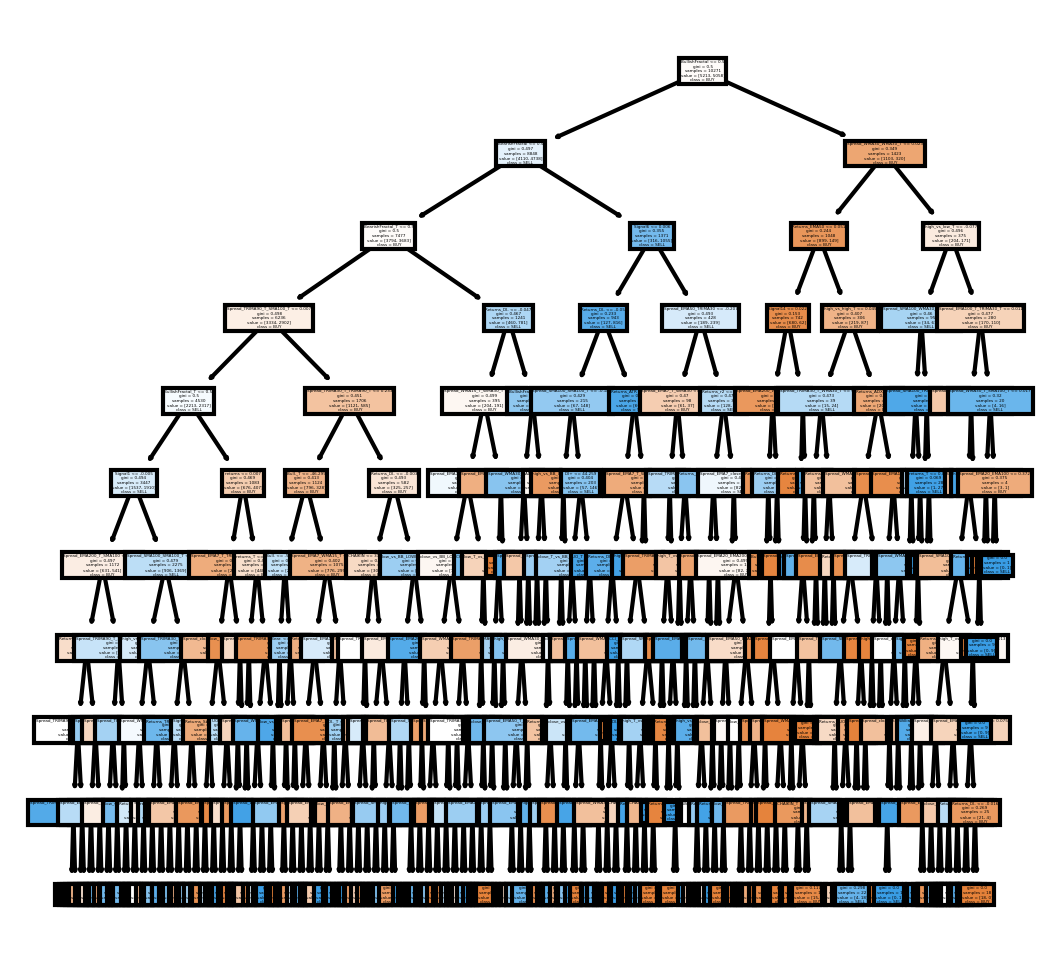

In [ ]:
var = train.drop(columns=listeNom).columns
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(listeModel[0],
               feature_names = var, 
               class_names=['BUY','SELL'],
               filled = True)
plt.savefig("model1.png")

## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

criterion=["gini"]
n_estimators = [200]
max_depth = [50]
min_samples_split = [4]


parameters = {
              'max_depth' : max_depth,
              'criterion' : criterion,
              'min_samples_split' : min_samples_split,
              'n_estimators' : n_estimators
             }

listeModelRF=[]
listePredRF=[]
listeValueRF=[]
listeNom2RF=[]
listeProbaRF=[]
listeVarExplicativeRF=[]


#GridSearch
RFC = RandomForestClassifier()
clf = GridSearchCV(RFC, parameters, scoring = 'f1_macro', cv = 5 )
clf.fit(X_train, train['Signal0'])
gridsearch_result = pd.DataFrame(clf.cv_results_["params"])
gridsearch_result["score"] = clf.cv_results_["mean_test_score"]
gridsearch_result.sort_values("score",ascending=False,inplace=True)

for i in listeNom:
  y_train = train[i]
  y_test = test[i]

  #Take Pbest parameter from the gridsearch

  RF = RandomForestClassifier(criterion="gini",
                              max_depth=gridsearch_result['max_depth'][0],
                              min_samples_split=gridsearch_result['min_samples_split'][0],
                              n_estimators=gridsearch_result['n_estimators'][0])
  RF.fit(X_train, y_train)
  y_pred = RF.predict(X_test)
  c1=0
  c2=0
  c3=0
  y=np.array(y_test)
  for j in range(len(y_pred)):
    if y_pred[j] == 1 and y[j] == y_pred[j] :
      c1+=1
    elif y_pred[j] == 2 and y[j] == y_pred[j]:
      c2+=1
    elif y_pred[j] == 3 and y[j] == y_pred[j]:
      c3+=1
  if y_pred.tolist().count(1) !=0:
    proba1 = c1/(y_pred.tolist().count(1))
    print(i+", % pour BUY : " + str(round(proba1,3)) + 
          " Nombre d'occurence : " + 
          str(y_pred.tolist().count(1)))
  else:
    proba1 = 0
  if y_pred.tolist().count(2) !=0:
    proba2 = c2/(y_pred.tolist().count(2))
    print(i+", % pour SELL : " + str(round(proba2,3))+ 
          " Nombre d'occurence : " + 
          str(y_pred.tolist().count(2)))
  else:
    proba2=0
  if y_pred.tolist().count(3) !=0:
    proba3=c3/(y_pred.tolist().count(3))
    print(i+", % pour NEUTRAL : " + 
          str(round(proba3,3))+ 
          " Nombre d'occurence : " + 
          str(y_pred.tolist().count(3)))
  else : 
    proba3=0 
  listeNom2RF.append(i)
  listeModelRF.append(RF)
  listePredRF.append(y_pred)
  listeValueRF.append(y_test)
  listeProbaRF.append([proba1,proba2])
  #Calcul des probabilités pour chaque evenement
  #Avec evenement : prediction du modele juste pour un type de classe (1 ou 2), le 3 n'est pas utile dans notre cas car il importe aucune info
  #La seule info qui peut etre utilisé est la mise en place d'un Stop Loss

Signal0, % pour BUY : 0.648 Nombre d'occurence : 2679
Signal0, % pour SELL : 0.637 Nombre d'occurence : 2381
Signal1, % pour BUY : 0.599 Nombre d'occurence : 2542
Signal1, % pour SELL : 0.597 Nombre d'occurence : 2443
Signal1, % pour NEUTRAL : 0.547 Nombre d'occurence : 75
Signal2, % pour BUY : 0.544 Nombre d'occurence : 2298
Signal2, % pour SELL : 0.544 Nombre d'occurence : 2161
Signal2, % pour NEUTRAL : 0.449 Nombre d'occurence : 601
Signal3, % pour BUY : 0.512 Nombre d'occurence : 1757
Signal3, % pour SELL : 0.505 Nombre d'occurence : 1689
Signal3, % pour NEUTRAL : 0.511 Nombre d'occurence : 1614
Signal4, % pour BUY : 0.493 Nombre d'occurence : 1259
Signal4, % pour SELL : 0.468 Nombre d'occurence : 1142
Signal4, % pour NEUTRAL : 0.528 Nombre d'occurence : 2659
Signal5, % pour BUY : 0.489 Nombre d'occurence : 832
Signal5, % pour SELL : 0.424 Nombre d'occurence : 733
Signal5, % pour NEUTRAL : 0.569 Nombre d'occurence : 3495
Signal6, % pour BUY : 0.5 Nombre d'occurence : 530
Signal6, %

In [ ]:
print(gridsearch_result)

  criterion  max_depth  min_samples_split  n_estimators     score
0      gini         50                  4           200  0.636015


## Gradient Boost

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

n_estimators = [200]
max_depth = [30]
min_samples_split = [2]
learning_rate = [1]

parameters = {'n_estimators': n_estimators ,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'learning_rate' : learning_rate
             }

listeModelGB=[]
listePredGB=[]
listeValueGB=[]
listeNom2GB=[]
listeProbaGB=[]
listeVarExplicativeGB=[]


#GridSearch
#GBC = GradientBoostingClassifier()
#clf = GridSearchCV(GBC, parameters, scoring = 'f1', cv = 5 )
#clf.fit(X_train, train['Signal0'])
#gridsearch_result = pd.DataFrame(clf.cv_results_["params"])
#gridsearch_result["score"] = clf.cv_results_["mean_test_score"]
#gridsearch_result.sort_values("score",ascending=False,inplace=True)

for i in listeNom:
  y_train = train[i]
  y_test = test[i]

  #Take Pbest parameter from the gridsearch

  GB = GradientBoostingClassifier(
                              max_depth=20,
                              min_samples_split=2,
                              n_estimators=200,
                              learning_rate=1)
  GB.fit(X_train, y_train)
  y_pred = GB.predict(X_test)
  c1=0
  c2=0
  c3=0
  y=np.array(y_test)
  for j in range(len(y_pred)):
    if y_pred[j] == 1 and y[j] == y_pred[j] :
      c1+=1
    elif y_pred[j] == 2 and y[j] == y_pred[j]:
      c2+=1
    elif y_pred[j] == 3 and y[j] == y_pred[j]:
      c3+=1
  if y_pred.tolist().count(1) !=0:
    proba1 = c1/(y_pred.tolist().count(1))
    print(i+", % pour BUY : " + str(round(proba1,3)) + 
          " Nombre d'occurence : " + 
          str(y_pred.tolist().count(1)))
  else:
    proba1 = 0
  if y_pred.tolist().count(2) !=0:
    proba2 = c2/(y_pred.tolist().count(2))
    print(i+", % pour SELL : " + str(round(proba2,3))+ 
          " Nombre d'occurence : " + 
          str(y_pred.tolist().count(2)))
  else:
    proba2=0
  if y_pred.tolist().count(3) !=0:
    proba3=c3/(y_pred.tolist().count(3))
    print(i+", % pour NEUTRAL : " + 
          str(round(proba3,3))+ 
          " Nombre d'occurence : " + 
          str(y_pred.tolist().count(3)))
  else : 
    proba3=0 
  listeNom2GB.append(i)
  listeModelGB.append(GB)
  listePredGB.append(y_pred)
  listeValueGB.append(y_test)
  listeProbaGB.append([proba1,proba2])

Signal0, % pour BUY : 0.669 Nombre d'occurence : 2664
Signal0, % pour SELL : 0.658 Nombre d'occurence : 2396
Signal1, % pour BUY : 0.614 Nombre d'occurence : 2527
Signal1, % pour SELL : 0.609 Nombre d'occurence : 2370
Signal1, % pour NEUTRAL : 0.38 Nombre d'occurence : 163
Signal2, % pour BUY : 0.571 Nombre d'occurence : 2203
Signal2, % pour SELL : 0.577 Nombre d'occurence : 2076
Signal2, % pour NEUTRAL : 0.429 Nombre d'occurence : 781
Signal3, % pour BUY : 0.561 Nombre d'occurence : 1771
Signal3, % pour SELL : 0.548 Nombre d'occurence : 1618
Signal3, % pour NEUTRAL : 0.49 Nombre d'occurence : 1671
Signal4, % pour BUY : 0.528 Nombre d'occurence : 1366
Signal4, % pour SELL : 0.528 Nombre d'occurence : 1214
Signal4, % pour NEUTRAL : 0.546 Nombre d'occurence : 2480
Signal5, % pour BUY : 0.523 Nombre d'occurence : 1053
Signal5, % pour SELL : 0.508 Nombre d'occurence : 980
Signal5, % pour NEUTRAL : 0.599 Nombre d'occurence : 3027
Signal6, % pour BUY : 0.534 Nombre d'occurence : 791
Signal6,

## Optimisation : Scoring

In [ ]:
dfProbaDT=pd.DataFrame(listeProba).transpose()
dfProbaDT.to_excel('ProbaDT.xlsx')
dfProbaRF=pd.DataFrame(listeProbaRF).transpose()
dfProbaRF.to_excel('ProbaDT.xlsx')
dfProbaGB=pd.DataFrame(listeProbaGB).transpose()
dfProbaGB.to_excel('ProbaDT.xlsx')

## Prevision 30 dernier jour bitcoin

Get Data BTC

In [ ]:
listeCoin=["BTC"]
listeSignal=[0]
listeNom=["Signal"+str(i) for i in range(len(listeSignal))]
#Ensemble des coin en concat
dico={}
listeIndi_T=['ATR','volume', 'RSI', 'TRIMA30', 'TRIMA90',
       'EMA7', 'EMA20', 'EMA50','EMA100','EMA200', 'ADX', 'SAR', 'Williams', 'SMA100', 'CCI',
       'ADL', 'AO', 'UO', 'CHAIKIN', 'WMA15', 'WMA30', 'BearishFractal',
       'BullishFractal', 'pivot', 's1', 's2', 's3', 's4', 'r1', 'r2', 'r3',
       'r4', 'MACD', 'DI+', 'DI-', 'Bull.', 'Bear.', 'BB_UPPER',
       'BB_MIDDLE', 'BB_LOWER', 'TENKAN', 'KIJUN', 'senkou_span_a', 'SENKOU',
       'returns','close',"high","low"]
for j in listeCoin:
  df=daily_price_historical(j, 'USD')
  df2=df[["high","low","open","close","timestamp","volumeto"]]
  df2.rename(columns={'timestamp':'Date','volumeto':'volume'},inplace=True)
  df2.set_index(['Date'],inplace=True)
  df2=df2[df2['close']!=0]
  df2=InitIndiTech(df2)
  df2=InitStrat(df2)
  df2['returns'] = (np.log(df2.close / df2.close.shift(1)))
  df3=df2.drop(df2.head(1).index)
  for i in listeIndi_T :
    df3[i+"_T"]=df2[i].drop(df2.tail(1).index).tolist()

  df3=df3[df3.index>=(datetime.today()-timedelta(31)).strftime('%Y-%m-%d')]
  #Create variables : ticket, signal, signal10,signal20,signal30,signal40 
  df3["Ticket"]=j
  l3=[]
  for i in range(len(df3)-1):
    l2=[]
    for k in range(len(listeSignal)) :
      if df3['returns'][i+1]>=listeSignal[k]:
        l2.append(1)
      elif df3['returns'][i+1]<=(-listeSignal[k]):
        l2.append(2)
      else:
        l2.append(3)
    l3.append(l2)
  
  df3.drop(df3.tail(1).index,inplace=True)
  df3=df3.merge(pd.DataFrame(l3,columns=listeNom,index=df3.index),how='inner',on=df3.index)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
listeSpread=["close","EMA7","EMA20","EMA50","EMA100","EMA200","close_T","EMA7_T","EMA20_T",
             "EMA50_T","EMA100_T","EMA200_T",'TRIMA30', 'TRIMA90','WMA15',
             'WMA30', 'SMA100','TRIMA30_T', 'TRIMA90_T','WMA15_T', 'WMA30_T', 'SMA100_T']
for i in range(len(listeSpread)-1):
  for j in range(i+1,len(listeSpread)):
    c = (df3[listeSpread[j]]-df3[listeSpread[i]])/df3[listeSpread[i]]
    df3["Spread_"+listeSpread[i]+"_"+listeSpread[j]] = c

listeReturns = ['ATR','volume', 'RSI', 'ADX', 'SAR', 'Williams', 'CCI',
       'ADL', 'AO', 'UO', 'CHAIKIN', 'BearishFractal',
       'BullishFractal', 'pivot', 's1', 's2', 's3', 's4', 'r1', 'r2', 'r3',
       'r4', 'MACD', 'DI+', 'DI-', 'Bull.', 'Bear.', 
        'TENKAN', 'KIJUN', 'senkou_span_a', 'SENKOU',"close","EMA7","EMA20",
        "EMA50","EMA100","EMA200",'TRIMA30', 'TRIMA90','WMA15',
             'WMA30', 'SMA100']
for i in listeReturns :
  df3["Returns_"+i]=(df3[i]-df3[i+"_T"])/df3[i+"_T"]

listePercent=["high","low","close","high_T","low_T","close_T",'BB_UPPER',
       'BB_MIDDLE', 'BB_LOWER','BB_UPPER_T',
       'BB_MIDDLE_T', 'BB_LOWER_T']
for i in range(len(listePercent)-1):
  for j in range(i+1,len(listePercent)):
     c = (df3[listePercent[j]]-df3[listePercent[i]])/df3[listePercent[i]]
     df3[listePercent[i]+"_vs_"+listePercent[j]] = c

l=[]
for i in df3.columns :
  if 'BUY' in df3[i].tolist() or 'SELL' in df3[i].tolist() or 'NEUTRAL -' in df3[i].tolist() or 'NEUTRAL +' in df3[i].tolist():
    l.append(i)
for i in l:
  df3[i].replace(['BUY','NEUTRAL +'],1,inplace=True)
  df3[i].replace(['SELL','NEUTRAL -'],-1,inplace=True)
  df3[i].replace('NEUTRAL',0,inplace=True)



In [ ]:
dfFinal=df3.reset_index()
dfFinal=dfFinal.drop(columns=['Signal0','Returns_Williams','key_0','index','high','low','open','close','volume','volume_T','high_T','low_T','close_T',"TRIMA30","TRIMA90",
                      "EMA7","EMA20","EMA50","EMA100","EMA200","SMA100","WMA15","WMA30","BB_UPPER","BB_MIDDLE","BB_LOWER","TRIMA30_T","TRIMA90_T",
                      "EMA7_T","EMA20_T","EMA50_T","EMA100_T","EMA200_T","SMA100_T","WMA15_T","WMA30_T","BB_UPPER_T","BB_MIDDLE_T","BB_LOWER_T","Ticket"])
dfFinal.replace([np.inf, -np.inf], np.nan, inplace=True)
dfFinal.dropna(axis='columns', inplace=True)

In [ ]:
for i in dfFinal.columns.tolist():
  if i not in df6 :
    print(i)

In [ ]:
predictionDT = []
for i in listeModel :
  predictionDT.append(i.predict(dfFinal))

predictionRF = []
for i in listeModelRF :
  predictionRF.append(i.predict(dfFinal))

predictionGB = []
for i in listeModel :
  predictionGB.append(i.predict(dfFinal))

In [ ]:
dfPredDT=pd.DataFrame(predictionDT).transpose()
dfPredRF=pd.DataFrame(predictionRF).transpose()
dfPredGB=pd.DataFrame(predictionGB).transpose()

In [ ]:
listeProba[0][1]

0.6360069747166521

In [ ]:
score=[]
for i in range(len(dfPredDT)):
  scoreBuy=0
  scoreSell=0
  for j in range(len(dfPredDT.columns)):
    if dfPredDT.iloc[i,j]==2:
      scoreSell+=listeProba[j][1]
    elif dfPredDT.iloc[i,j]==1:
      scoreBuy+=listeProba[j][0]

    if dfPredRF.iloc[i,j]==2:
      scoreSell+=listeProbaRF[j][1]
    elif dfPredRF.iloc[i,j]==1:
      scoreBuy+=listeProbaRF[j][0]

    if dfPredGB.iloc[i,j]==2:
      scoreSell+=listeProbaGB[j][1]
    elif dfPredGB.iloc[i,j]==1:
      scoreBuy+=listeProbaGB[j][0]
  score.append([scoreBuy,scoreSell])

In [ ]:
dfPrevision=df3[['Signal0','returns']]
dfPrevision[['ScoreBUY','ScoreSELL']]=score
dfPrevision.drop(dfPrevision.tail(1).index,inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
liste=[]
for i in range(len(dfPrevision)):
  if dfPrevision['ScoreBUY'][i]>=dfPrevision['ScoreSELL'][i]:
    liste.append('BUY')
  else:
    liste.append('SELL')
dfPrevision['Position']=liste

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [ ]:
portefeuille=[100]
for i in range(len(dfPrevision)-1):
  if dfPrevision['Position'][i]=='BUY':
    portefeuille.append(portefeuille[i]*(1+dfPrevision['returns'][i+1]))
  else:
    portefeuille.append(portefeuille[i]*(1-dfPrevision['returns'][i+1]))

In [ ]:
dfPrevision['Portefeuille']=portefeuille

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
dfPrevision.to_excel("Prev30J.xlsx")

In [ ]:
pd.DataFrame(listeProbaGB).transpose().to_excel("ProbaGB.xlsx")

In [ ]:
l=[]
for i in dfPredDT.columns :
  dfPredDT[i].replace([1],"Buy",inplace=True)
  dfPredDT[i].replace([2],"Sell",inplace=True)
  dfPredDT[i].replace(3,'Neutre',inplace=True)
dfPredDT.to_excel("Prev30JDT.xlsx")

In [ ]:
l=[]
for i in dfPredGB.columns :
  dfPredGB[i].replace([1],"Buy",inplace=True)
  dfPredGB[i].replace([2],"Sell",inplace=True)
  dfPredGB[i].replace(3,'Neutre',inplace=True)
dfPredGB.to_excel("Prev30JGB.xlsx")

In [ ]:
l=[]
for i in dfPredRF.columns :
  dfPredRF[i].replace([1],"Buy",inplace=True)
  dfPredRF[i].replace([2],"Sell",inplace=True)
  dfPredRF[i].replace(3,'Neutre',inplace=True)
dfPredRF.to_excel("Prev30JRF.xlsx")